# Explore here

1. Recopilación de datos 

In [81]:
# La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos

import pandas as pd

#Recopila los datos del archivo csv
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

#Lee las tablas 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
#Se guarda archivo en ./data/raw

data.to_csv("../data/raw/Datos_Insurance.csv")

2. Exploración y limpieza de datos

In [83]:
#Obtener las dimensiones 
data.shape

#Tenemos 1338 filas con 7 columnas 

(1338, 7)

In [84]:
#Revisa los datos y sus tipos  
data.info()

#No existe NaN
#Datos Categoricos:sex, smoker, region
#Datos Numericos: age, bmi, children, charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
# Revisar si existe duplicados y si es asi los elimina 

data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
#Se elimina datos irrelevante
data.drop(["region","children"], axis = 1, inplace = True)
data.head()

#Se elimina region y children(segun enunciado ya estan cubiertos por un seguro y se evalua solo datos fisiológicos de sus clientes )
#Nos quedamos con las siguientes: 
#   Datos Categoricos:sex, smoker
#   Datos Numericos: age, bmi, charges

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


3. Análisis de variables univariante

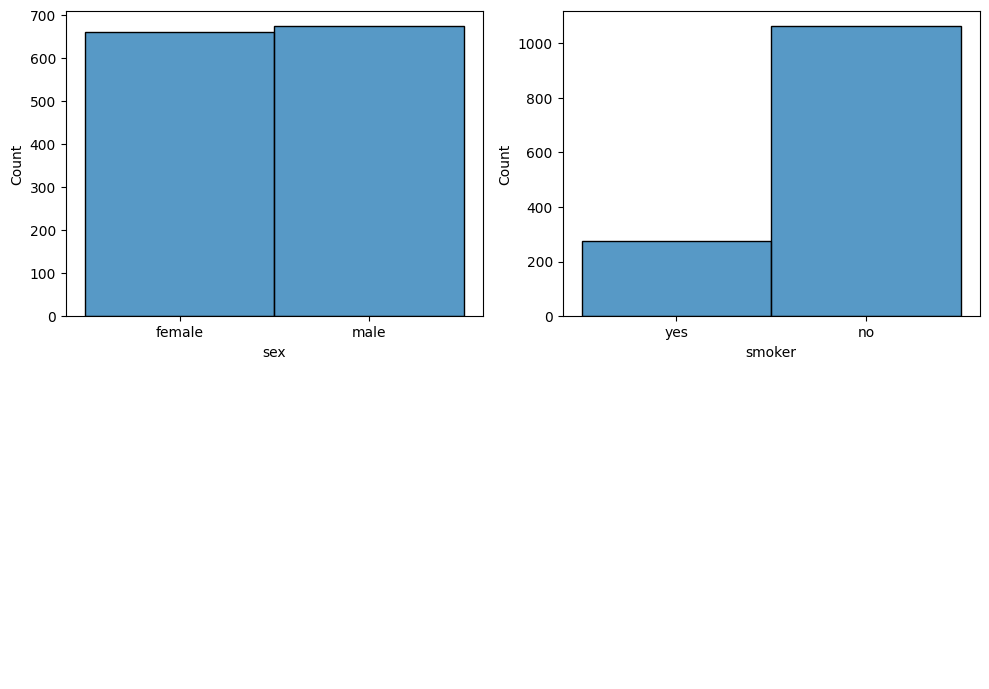

In [87]:
#Análisis sobre variables categóricas

import matplotlib.pyplot as plt 
import seaborn as sns

#Datos Categoricos:sex, smoker

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "sex")
sns.histplot(ax = axis[0, 1], data = data, x = "smoker")

# Ocultar el último cuadrante vacío
axis[1, 0].axis('off')
axis[1, 1].axis('off')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

#se observa:
# Gran parte de los clientes no fuman 
# la diferencia entre la cantidad de male y female es muy baja . Sin embargo hay mas male

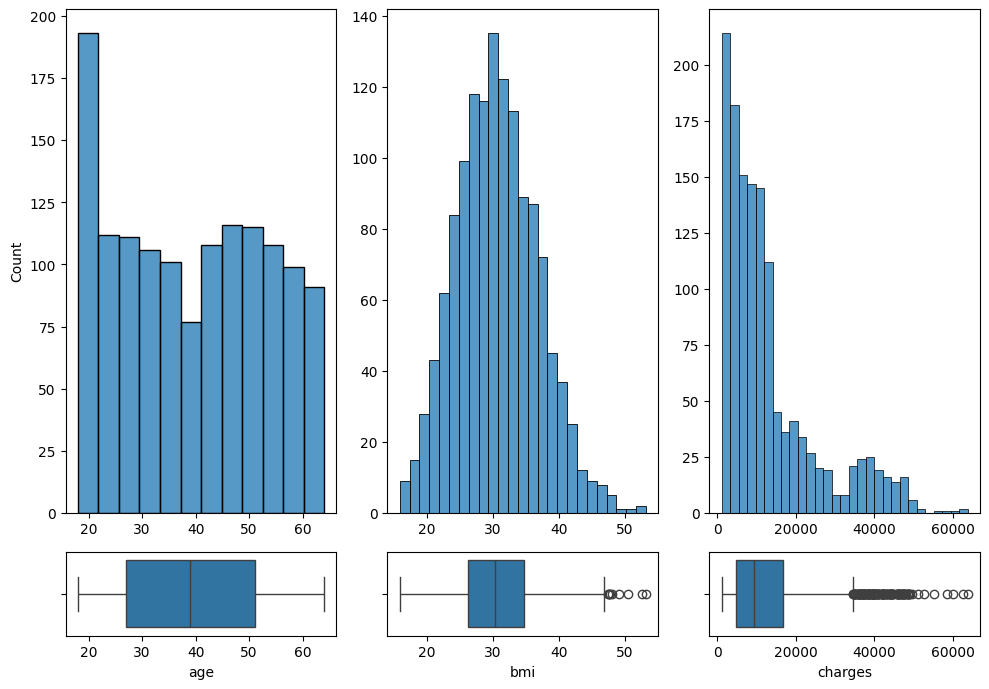

In [88]:
#Análisis sobre variables numéricas
#Datos Numericos: age, bmi, charges

fig, axis = plt.subplots(2, 3, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[0, 2], data = data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data, x = "charges")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

#Se observa:
# el bmi posee una distribucion normal , tiene pocos outliers
# charges posee una grafica asimetrica con varios datos dispersos 

4. Análisis de variables multivariadas

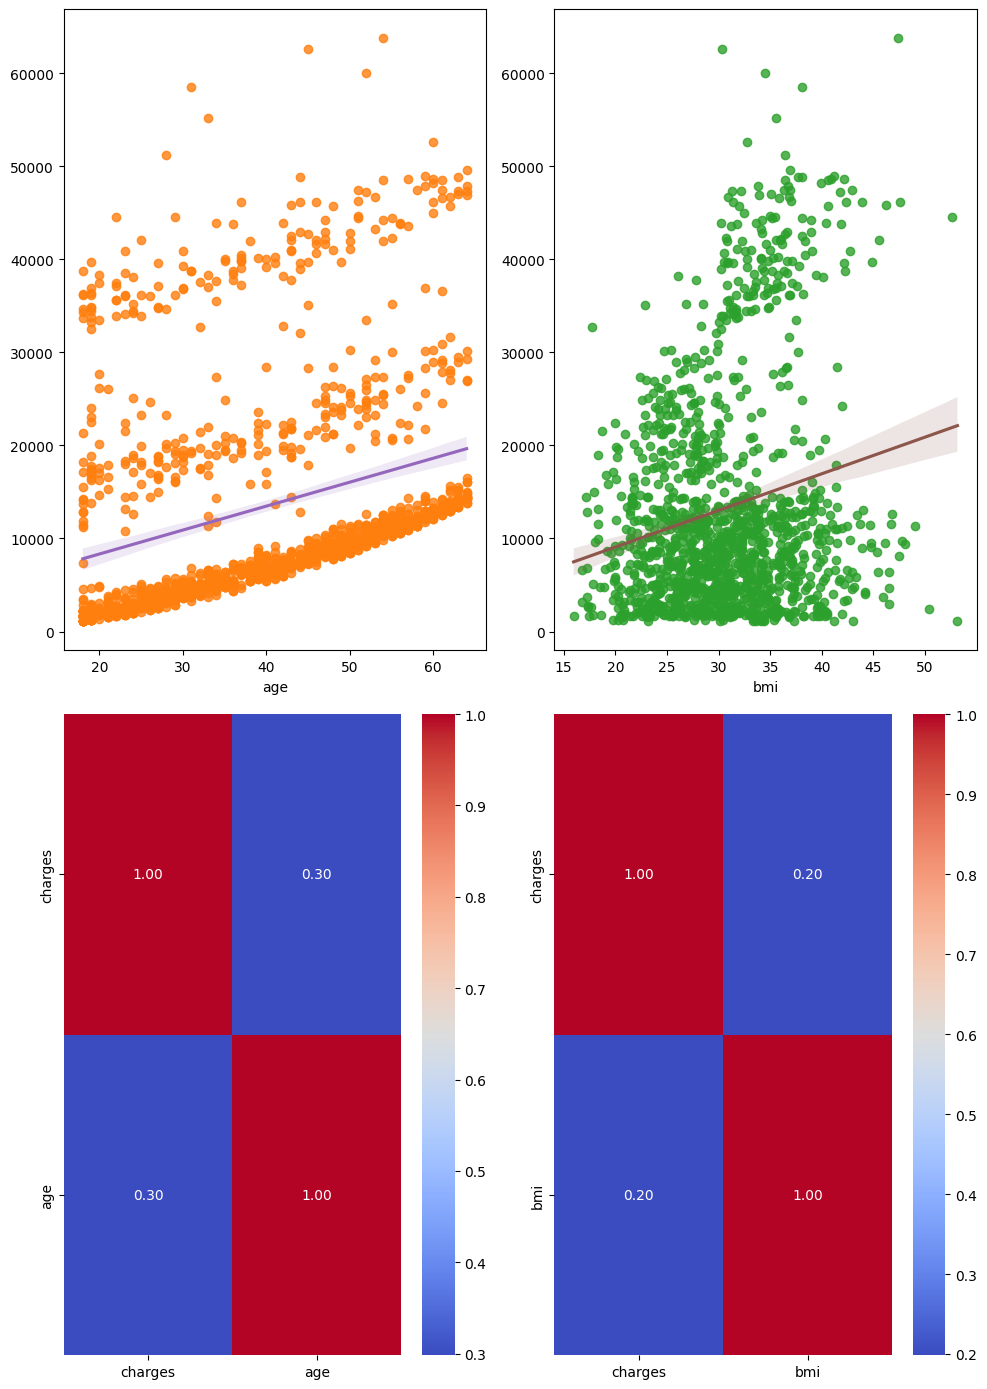

In [89]:
# Crear la figura y ejes (2 filas, 2 columnas)
fig, axis = plt.subplots(2, 2, figsize=(10, 14))

# Regplot para 'age' vs 'charges'
sns.regplot(ax=axis[0, 0], data=data, x="age", y="charges", 
            scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)

# Heatmap para la correlación entre 'age' y 'charges'
sns.heatmap(data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cmap='coolwarm')

# Regplot para 'bmi' vs 'charges'
sns.regplot(ax=axis[0, 1], data=data, x="bmi", y="charges", 
            scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#8c564b'}).set(ylabel=None)

# Heatmap para la correlación entre 'bmi' y 'charges'
sns.heatmap(data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cmap='coolwarm')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#Se observa:
# Se visualiza una relacion positiva moderada entre age y charges de un 0.30. Esto significa que, a medida que la edad de los pacientes aumenta, los cargos médicos tienden a incrementarse, aunque no de manera muy fuerte 
# Por otra parte , un coeficiente de 0.20 sugiere una relación positiva débil entre bmi y charges 


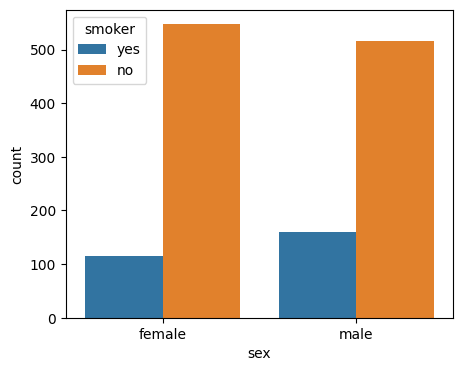

In [90]:
# Analisis categorico categorico 
#Datos Categoricos:sex, smoker

fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data, x = "sex", hue = "smoker")

# Muestra el grafico 
plt.show()

#Se observa:
# Son muy poco los pasientes que fuman. Sin embargo se ve mayor cantidad en los hombres 

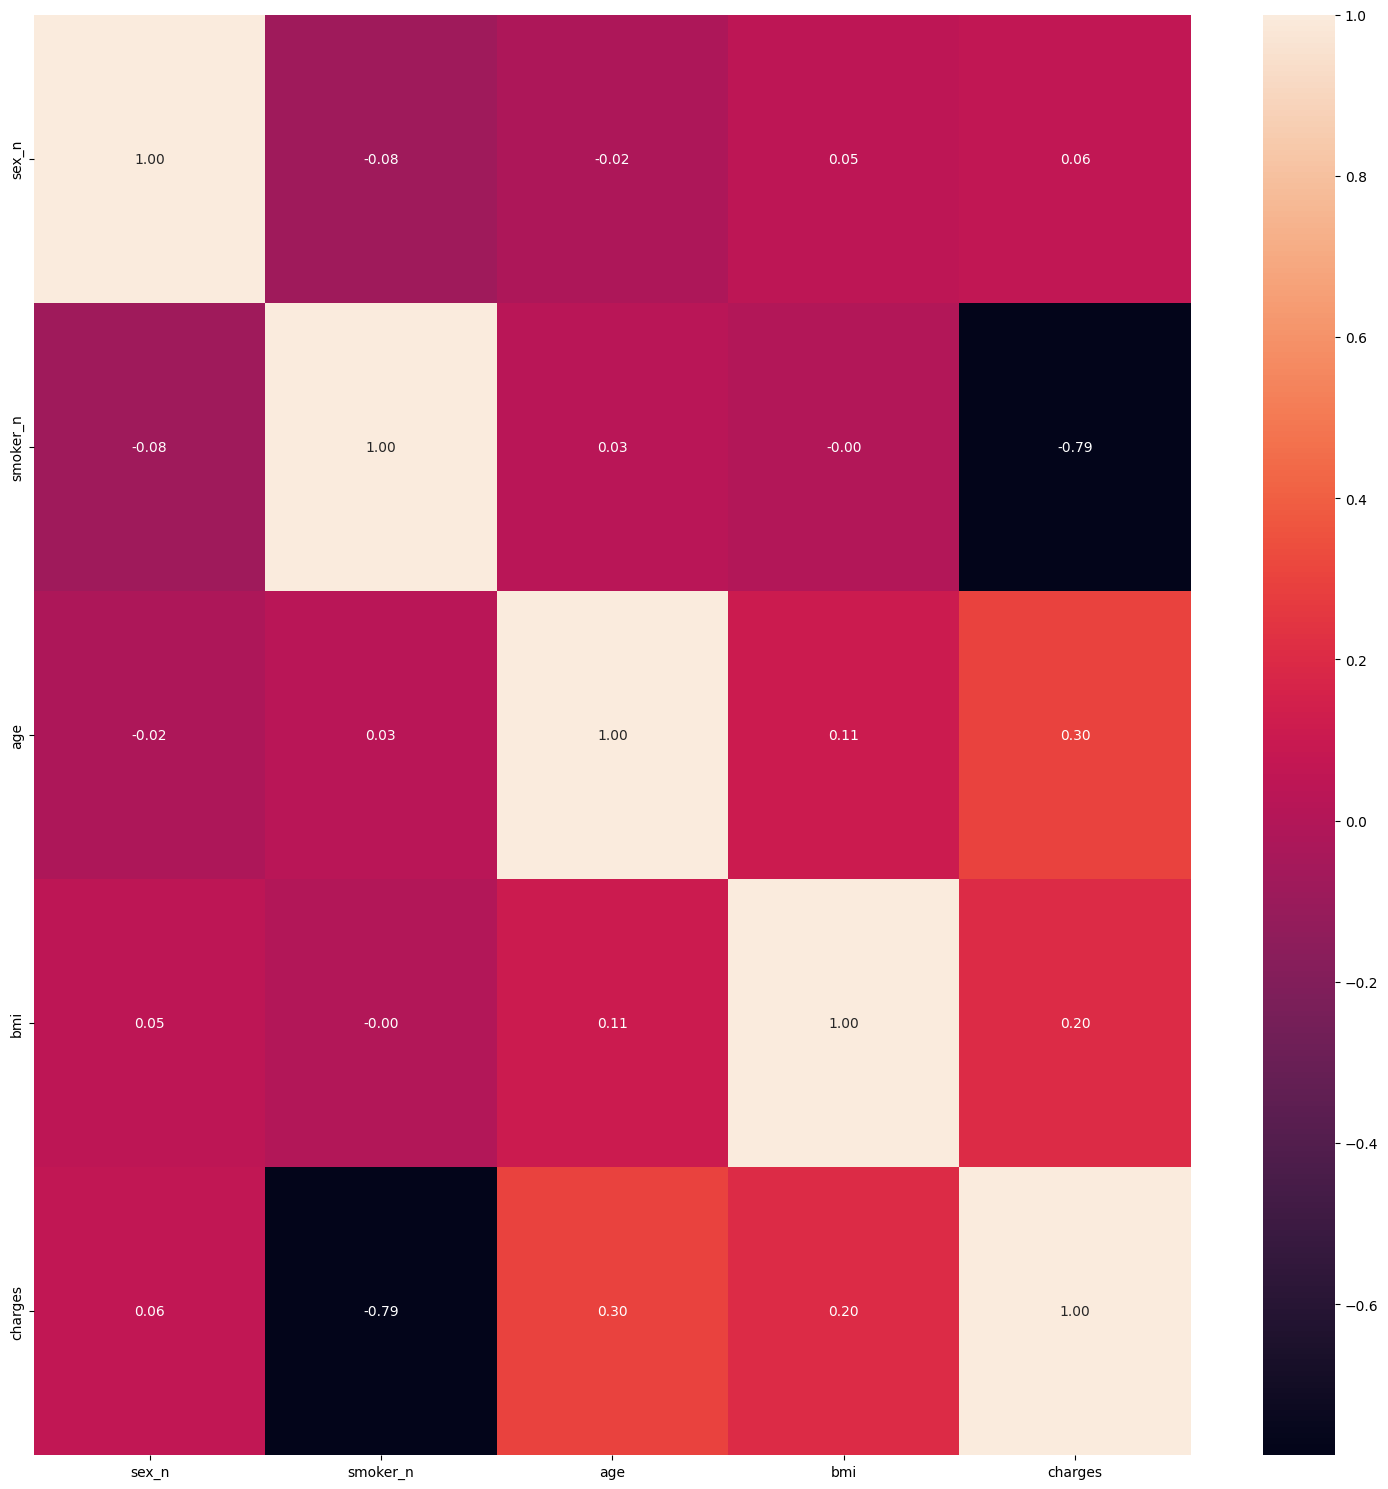

In [91]:
#Analisis numerico categorico 

#El objetivo del código es crear un heatmap de correlación que muestre la relación entre diferentes variables del dataset.

#Datos Categoricos:sex, smoker
#Datos Numericos: age, bmi, charges

# Factorizacion 
data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]


fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data[["sex_n", "smoker_n","age", "bmi", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Muestra el grafico
plt.show()

# Se obseva:
# Se observa uns correlacion negativa de -0.79 de smoker y charges  puede  indicar que el tabaquismo es un factor importante en el aumento de los costos médicos por ende la prima del seguro sera alta 
# Se visualiza una relacion positiva moderada entre age y charges de un 0.30. Esto significa que, a medida que la edad de los pacientes aumenta, los cargos médicos tienden a incrementarse, aunque no de manera muy fuerte 



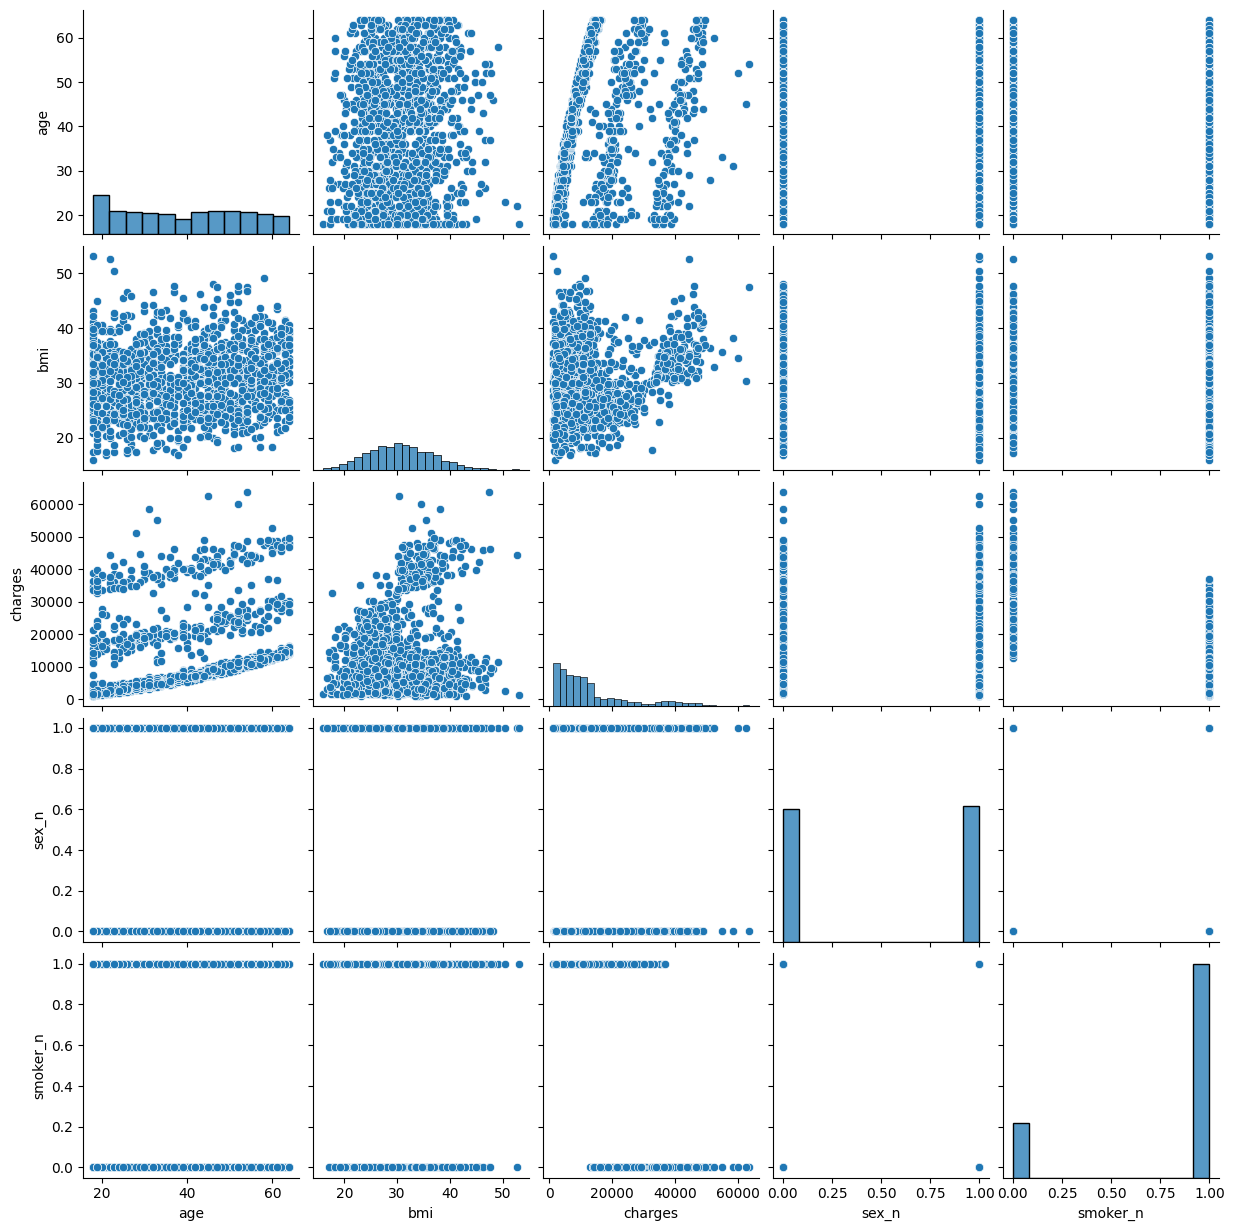

In [92]:
#Analisis de todos los datos 

sns.pairplot(data = data)

5. Ingeniería de funciones

In [93]:
#Análisis de valores atípicos

data.describe()

# Vemos los valores maximos y minimos , nuestros cuartiles (Q2 la mediana) , la media y desviacion estandar 

,age,bmi,charges,sex_n,smoker_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,13279.121487,0.504862,0.795064
std,14.044333,6.100468,12110.359656,0.500163,0.403806
min,18.000000,15.960000,1121.873900,0.000000,0.000000
25%,27.000000,26.290000,4746.344000,0.000000,1.000000
50%,39.000000,30.400000,9386.161300,1.000000,1.000000
75%,51.000000,34.700000,16657.717450,1.000000,1.000000
max,64.000000,53.130000,63770.428010,1.000000,1.000000


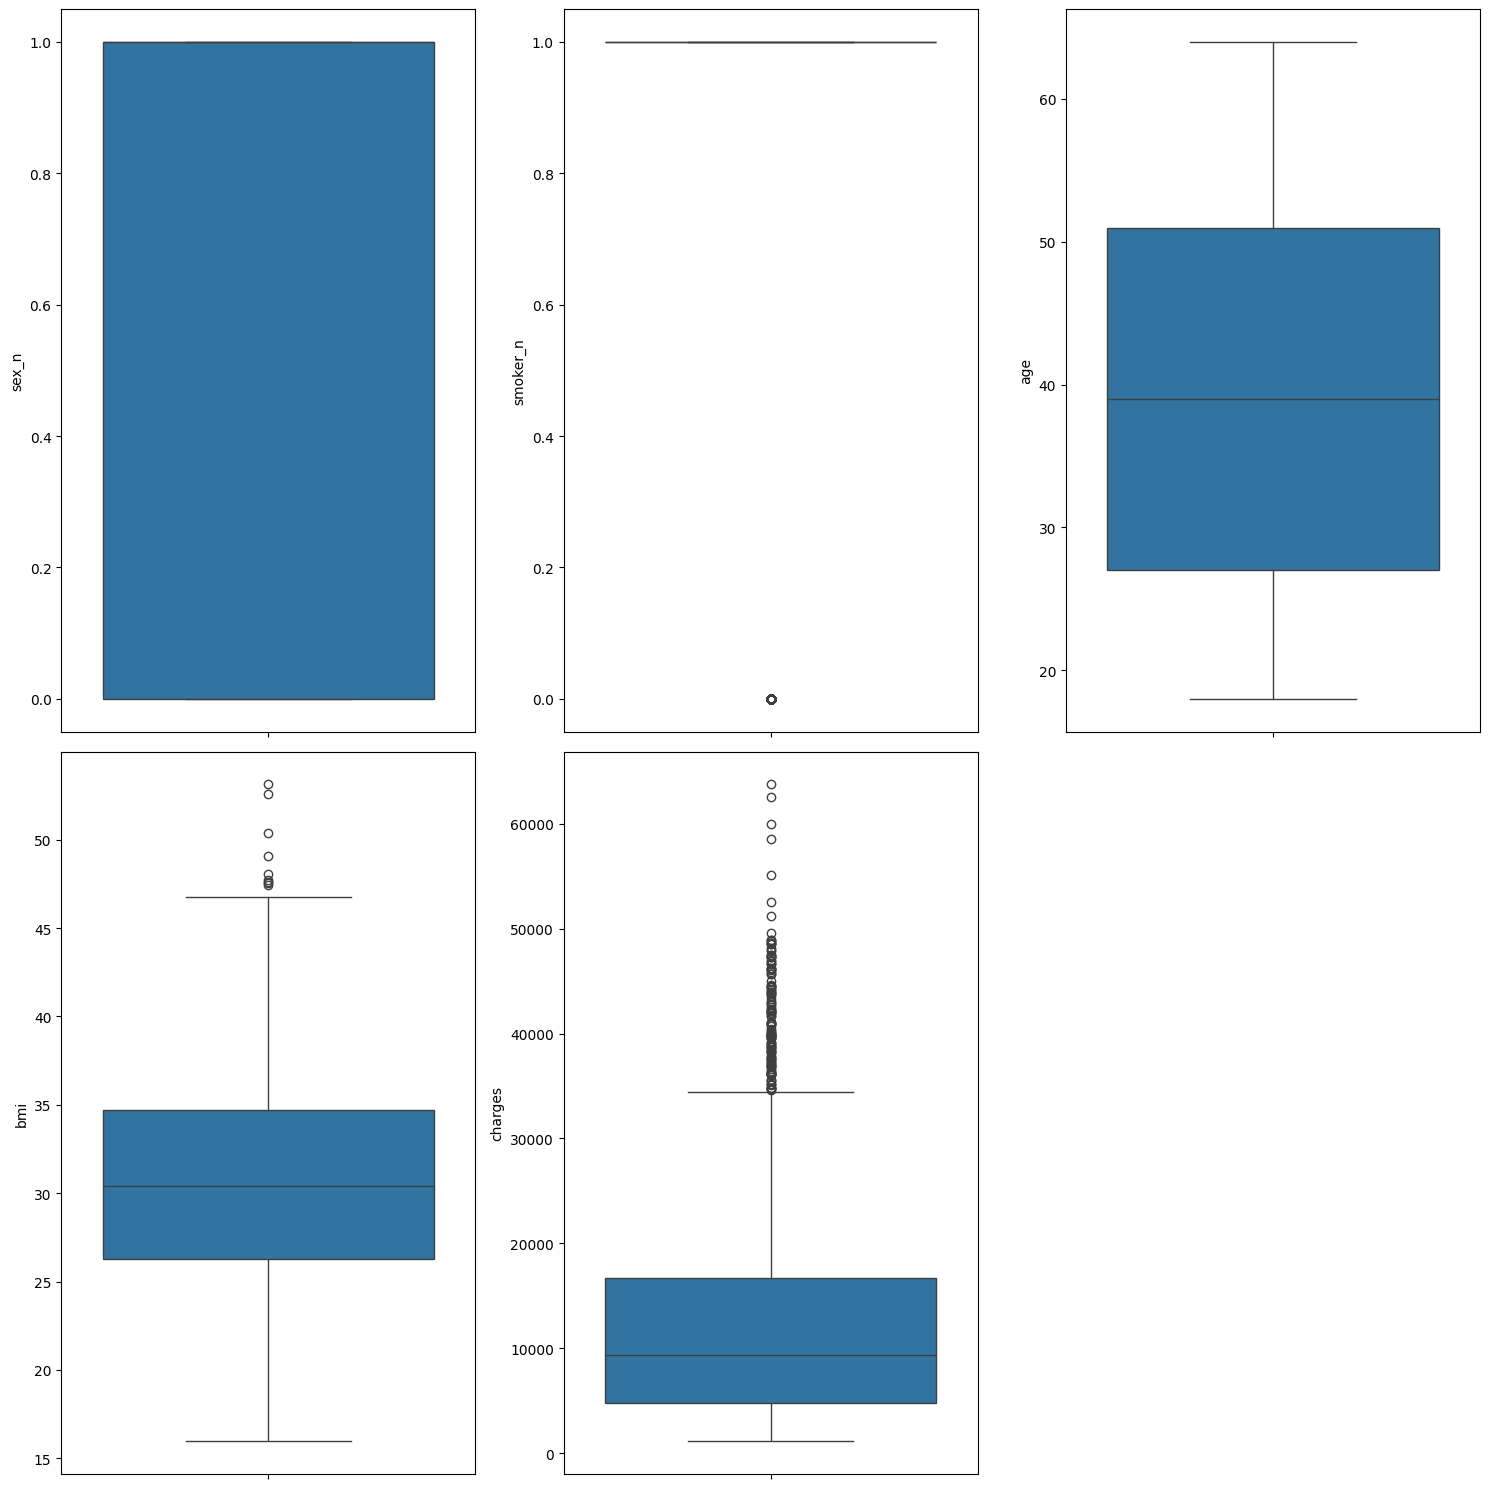

In [94]:
#Datos Categoricos:sex, smoker
#Datos Numericos: age, bmi, charges

fig, axes = plt.subplots(2, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = data, y = "sex_n")
sns.boxplot(ax = axes[0, 1], data = data, y = "smoker_n")
sns.boxplot(ax = axes[0, 2], data = data, y = "age")
sns.boxplot(ax = axes[1, 0], data = data, y = "bmi")
sns.boxplot(ax = axes[1, 1], data = data, y = "charges")

# elimina el último cuadrante vacío
fig.delaxes(axes[1, 2])


plt.tight_layout()

plt.show()

# Se observa:
# se refleja varios outliers especialmente em charges y bmi

Limpiamos los outliers

#Datos Categoricos:sex, smoker
#Datos Numericos: age, bmi, charges

In [95]:
#Limpiamos los outliers de charges
#Primero revisamos los datos de charges (Q, media , sdt)

charges_des= data["charges"].describe()

print(charges_des)

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


In [96]:
# IQR 

charges_iqr = charges_des["75%"] - charges_des["25%"]

upper_limit = charges_des["75%"] + 1.5 * charges_iqr
lower_limit = charges_des["25%"] - 1.5 * charges_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("charges_iqr : ",charges_iqr )

upper_limit :  34524.777625
lower_limit :  -13120.716174999998
charges_iqr :  11911.37345


In [97]:
# Limpieza de outliers

data = data[(data["charges"] <= 34524.777625) & (data["charges"] >= 0)]

In [98]:
#Limpiamos los outliers de bmi
#Primero revisamos los datos de charges (Q, media , sdt)

bmi_des= data["bmi"].describe()

print(bmi_des)

count    1198.000000
mean       30.094787
std         6.013044
min        15.960000
25%        25.800000
50%        29.735000
75%        33.820000
max        53.130000
Name: bmi, dtype: float64


In [99]:
# IQR 

bmi_iqr = bmi_des["75%"] - bmi_des["25%"]

upper_limit = bmi_des["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_des["25%"] - 1.5 * bmi_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("bmi_iqr : ",bmi_iqr )

upper_limit :  45.85
lower_limit :  13.770000000000001
bmi_iqr :  8.02


In [100]:
# Limpieza de outliers

data = data[(data["bmi"] <= 45.85) & (data["bmi"] >= 13.770000000000001)]

In [101]:
#Limpiamos los outliers de age 
#Primero revisamos los datos de age (Q, media , sdt)

age_des= data["age"].describe()

print(age_des)

count    1185.000000
mean       38.994093
std        14.072536
min        18.000000
25%        26.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


In [102]:
# IQR 

age_iqr = age_des["75%"] - age_des["25%"]

upper_limit = age_des["75%"] + 1.5 * age_iqr
lower_limit = age_des["25%"] - 1.5 * age_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("age_iqr : ",age_iqr )

upper_limit :  88.5
lower_limit :  -11.5
age_iqr :  25.0


In [103]:
# Limpieza de outliers

data = data[(data["age"] <= 88.5) & (data["age"] > 0)]

In [104]:
#Limpiamos los outliers de sex
#Primero revisamos los datos de sex (Q, media , sdt)

sex_des= data["sex_n"].describe()

print(sex_des)

count    1185.00000
mean        0.48692
std         0.50004
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: sex_n, dtype: float64


In [105]:
# IQR 

sex_iqr = sex_des["75%"] - sex_des["25%"]

upper_limit = sex_des["75%"] + 1.5 * sex_iqr
lower_limit = sex_des["25%"] - 1.5 * sex_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("sex_iqr : ",sex_iqr )

upper_limit :  2.5
lower_limit :  -1.5
sex_iqr :  1.0


In [106]:
# Limpieza de outliers

data = data[(data["sex_n"] <=  2.5) & (data["sex_n"] >= 0)]

In [107]:
#Limpiamos los outliers de smoker
#Primero revisamos los datos de smoker (Q, media , sdt)

smoker_des= data["smoker_n"].describe()

print(smoker_des)

count    1185.000000
mean        0.883544
std         0.320906
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: smoker_n, dtype: float64


In [108]:
# IQR 

smoker_iqr = smoker_des["75%"] - smoker_des["25%"]

upper_limit =smoker_des["75%"] + 1.5 * smoker_iqr
lower_limit = smoker_des["25%"] - 1.5 * smoker_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("smoker_iqr : ", smoker_iqr )

upper_limit :  1.0
lower_limit :  1.0
smoker_iqr :  0.0


In [109]:
# Limpieza de outliers

data = data[(data["smoker_n"] <=  1) & (data["smoker_n"] >= 0)]

Análisis de valor faltante

In [110]:
data.isnull().sum().sort_values(ascending=False)
# Refleja que no tiene datos nulos 

age         0
sex         0
bmi         0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

Escalado de funciones

In [111]:
#se imprime elementos del dataframe
data.columns

Index(['age', 'sex', 'bmi', 'smoker', 'charges', 'sex_n', 'smoker_n'], dtype='object')

In [112]:
# Se normaliza las variapbles para que tengan un rango estandar de [1, -1]

from sklearn.preprocessing import MinMaxScaler

variables = ['age', 'bmi', 'charges', 'sex_n', 'smoker_n']
scaler = MinMaxScaler()

scal_features = scaler.fit_transform(data[variables])

df_scal = pd.DataFrame(scal_features, index = data.index, columns = variables)

df_scal.head()

,age,bmi,charges,sex_n,smoker_n
0,0.021739,0.405158,0.472641,0.0,0.0
1,0.000000,0.604343,0.018101,1.0,1.0
2,0.217391,0.578215,0.099775,1.0,1.0
3,0.326087,0.228877,0.625547,1.0,1.0
4,0.304348,0.438412,0.082306,1.0,1.0


In [113]:
#Selecciona las mejores variables 

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = df_scal.drop("charges", axis = 1)
y = df_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = SelectKBest(f_regression, k = 4)
model.fit(X_train, y_train)

columns = X_train.columns[model.get_support()]
X_train_sel = pd.DataFrame(model.transform(X_train), columns = columns)
X_test_sel = pd.DataFrame(model.transform(X_test), columns = columns)

X_train_sel.head()


,age,bmi,sex_n,smoker_n
0,0.826087,0.208347,1.0,1.0
1,0.673913,0.865626,0.0,1.0
2,1.000000,0.678996,0.0,1.0
3,0.282609,0.361724,0.0,1.0
4,0.695652,0.551239,1.0,1.0


In [114]:
#Se guardan los datos de entrenamiento y de test
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/train.csv", index = False)
X_test_sel.to_csv("../data/processed/test.csv", index = False)

Regresión Lineal

1. Lectura del conjunto de datos procesado

In [115]:
# obtenemos los datos de entrenamiento y test

train_data = pd.read_csv("../data/processed/train.csv")
test_data = pd.read_csv("../data/processed/test.csv")

train_data.head()

,age,bmi,sex_n,smoker_n,charges
0,0.826087,0.208347,1.0,1.0,0.283506
1,0.673913,0.865626,0.0,1.0,0.295504
2,1.000000,0.678996,0.0,1.0,0.395550
3,0.282609,0.361724,0.0,1.0,0.079037
4,0.695652,0.551239,1.0,1.0,0.231279


In [116]:
test_data.head()

,age,bmi,sex_n,smoker_n,charges
0,0.673913,0.502884,0.0,1.0,0.259557
1,0.978261,0.600611,1.0,1.0,0.420967
2,0.000000,0.541568,0.0,1.0,0.032506
3,0.260870,0.322362,1.0,1.0,0.075656
4,0.260870,0.135392,0.0,1.0,0.137074


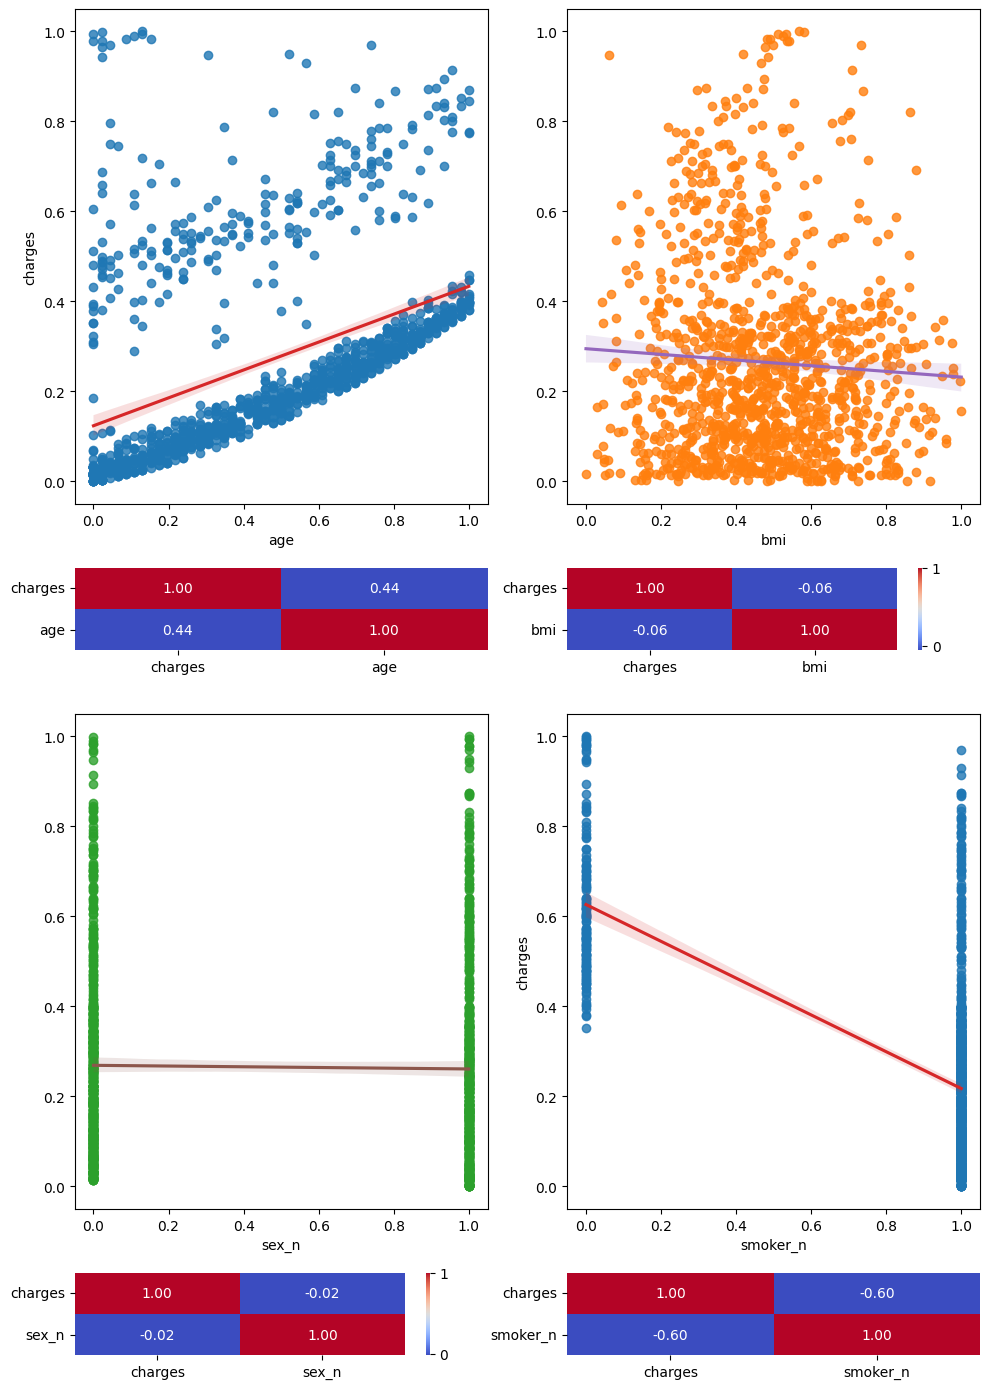

In [117]:

total_data = pd.concat([train_data, test_data])

# Crear la figura y ejes
fig, axis = plt.subplots(4, 2, figsize=(10, 14), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Crear los gráficos de regresión con colores asignados directamente
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="charges", 
            scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#d62728'})
sns.heatmap(total_data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False, cmap='coolwarm')

sns.regplot(ax=axis[0, 1], data=total_data, x="bmi", y="charges", 
            scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cmap='coolwarm')

sns.regplot(ax=axis[2, 0], data=total_data, x="sex_n", y="charges", 
            scatter_kws={'color': '#2ca02c'}, line_kws={'color': '#8c564b'}).set(ylabel=None)
sns.heatmap(total_data[["charges", "sex_n"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cmap='coolwarm').set(ylabel=None)

sns.regplot(ax=axis[2, 1], data=total_data, x="smoker_n", y="charges", 
            scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#d62728'})
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False, cmap='coolwarm')

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Se observa
# Una alta relacion la variable objetivo con edad y si la persona fuma
# La correlación de 0.44 indica una relación moderada positiva entre la edad y los cargos médicos. No es una correlación extremadamente fuerte, pero sugiere que la edad es un factor relevante en los costos del seguro médico.
## Se observa uns correlacion negativa de -0.60 de smoker y charges  puede  indicar que el tabaquismo es un factor importante en el aumento de los costos médicos por ende la prima del seguro sera alta 



In [118]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

 2. Inicialización y entrenamiento del modelo

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
# los parámetros (variables  y ) que ha ajustado el modelo:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 0.5031248865816003
Coeficientes (b): [ 0.33068169  0.03765037 -0.01220096 -0.45573735]


3. Predicción del modelo

In [121]:
y_pred = model.predict(X_test)
y_pred

array([0.28917202, 0.38129275, 0.06777776, 0.1335884 , 0.13874988,
       0.24785202, 0.69656444, 0.22025503, 0.05363487, 0.6954936 ,
       0.10374287, 0.09871329, 0.72652668, 0.08460874, 0.08679751,
       0.33415285, 0.30169289, 0.3410628 , 0.29301348, 0.10089386,
       0.19501988, 0.35590602, 0.39833808, 0.67454292, 0.21874114,
       0.36412148, 0.64100522, 0.19468827, 0.18986717, 0.27769928,
       0.08360351, 0.57305747, 0.09993106, 0.37129334, 0.36596176,
       0.37998327, 0.30406513, 0.26411802, 0.38955465, 0.06704954,
       0.18072602, 0.09215519, 0.34844084, 0.32896349, 0.09459076,
       0.22946933, 0.14117724, 0.3270576 , 0.27000535, 0.05779979,
       0.31242868, 0.23298907, 0.27955588, 0.33887813, 0.34466791,
       0.36427073, 0.2230001 , 0.13011455, 0.07110819, 0.24903788,
       0.73604933, 0.20656806, 0.33812203, 0.24827189, 0.06716275,
       0.04817321, 0.331057  , 0.11290784, 0.0533027 , 0.07621852,
       0.28853728, 0.26520396, 0.31919581, 0.21500654, 0.06737

In [122]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

ValueError: continuous is not supported

In [79]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.021036173339302675
R2 Score: 0.5179142881808854
